<h1 align = "center"> ANOVA </h2>

### Steps 

1 Enter data

2
Explore your data: as with any analysis, it’s a good idea to begin by
graphing your data and computing some descriptive statistics. You should
also check distributional assumptions and use Levene’s test to check for
homogeneity of variance 

3
Compute the basic ANOVA: you can then run the main analysis of variance.
Depending on what you found in the previous step, you might need to run a
robust version of the test.

4
Compute contrasts or post hoc tests: having conducted the main ANOVA
you can follow it up with either contrasts or post hoc tests. Again, the
exact methods you choose will depend upon what you unearth in step 2.

In [4]:
libido<-c(3,2,1,1,4,5,2,4,2,3,7,4,5,3,6)
id<-(1:15)
libido<-c(3,2,1,1,4,5,2,4,2,3,7,4,5,3,6)
dose<-gl(3,5, labels = c("Placebo", "Low Dose", "High Dose"))
viagraData<-data.frame(dose, libido)

In [5]:
library(ggplot2)
library(granova)
library(pastecs)
library(multcomp)
library(compute.es)
library(WRS)

####  Bootstrapped confidence interval to look at the distribution of the mean for each group

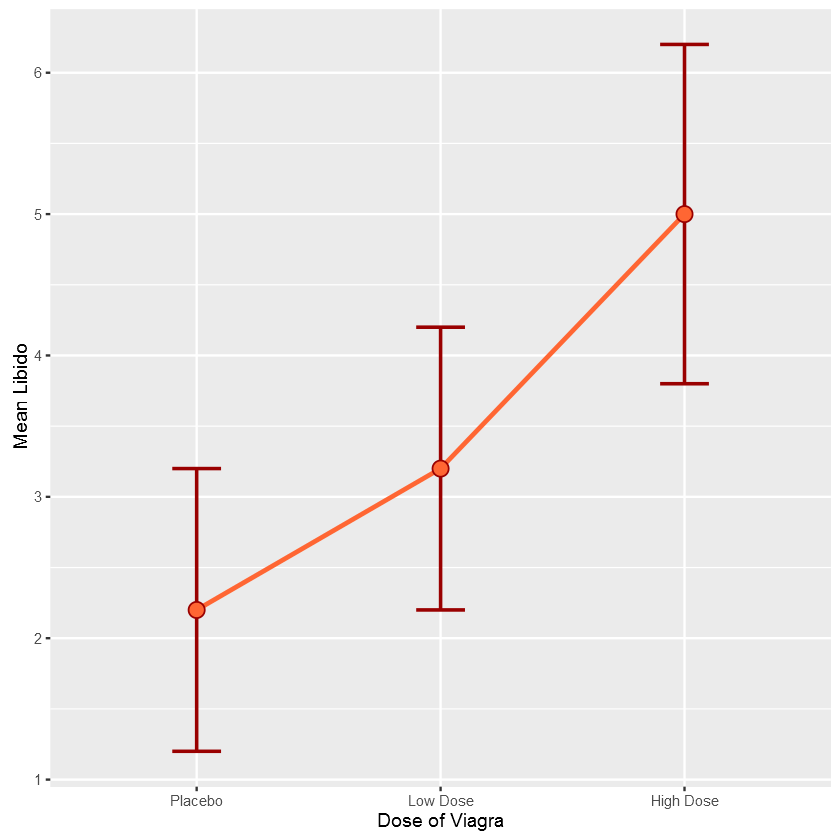

In [6]:
line <- ggplot(viagraData, aes(dose, libido))
line + stat_summary(fun.y = mean, geom = "line", size = 1, aes(group=1), colour = "#FF6633")+
stat_summary(fun.data = mean_cl_boot, 
              geom = "errorbar", 
              width = 0.2,
             size = 0.75, colour = "#990000") + 
stat_summary(fun.y = mean, geom = "point", size = 4, colour = "#990000") + 
stat_summary(fun.y = mean, geom = "point", size = 3, colour = "#FF6633") + labs(x = "Dose of Viagra", y = "Mean Libido")

In [11]:
#Descriptives
by(viagraData$libido, viagraData$dose, stat.desc) # CI.mean.0.95 doesn’t give you the interval
#itself, but the value to add or subtract from the mean to create the interval

viagraData$dose: Placebo
     nbr.val     nbr.null       nbr.na          min          max        range 
   5.0000000    0.0000000    0.0000000    1.0000000    4.0000000    3.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
  11.0000000    2.0000000    2.2000000    0.5830952    1.6189318    1.7000000 
     std.dev     coef.var 
   1.3038405    0.5926548 
------------------------------------------------------------ 
viagraData$dose: Low Dose
     nbr.val     nbr.null       nbr.na          min          max        range 
   5.0000000    0.0000000    0.0000000    2.0000000    5.0000000    3.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
  16.0000000    3.0000000    3.2000000    0.5830952    1.6189318    1.7000000 
     std.dev     coef.var 
   1.3038405    0.4074502 
------------------------------------------------------------ 
viagraData$dose: High Dose
     nbr.val     nbr.null       nbr.na          min       

In [12]:
#Levene's test
leveneTest(viagraData$libido, viagraData$dose, center = median)

,Df,F value,Pr(>F)
group,2.0000000,0.1176471,0.8900225
,12,NA,NA


### ANOVA

In [13]:
#ANOVA
viagraModel<-aov(libido~dose, data = viagraData)

In [15]:
#viagraModel<-lm(libido~dose, data = viagraData)
summary(viagraModel)
summary.lm(viagraModel)

            Df Sum Sq Mean Sq F value Pr(>F)  
dose         2  20.13  10.067   5.119 0.0247 *
Residuals   12  23.60   1.967                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = libido ~ dose, data = viagraData)

Residuals:
   Min     1Q Median     3Q    Max 
  -2.0   -1.2   -0.2    0.9    2.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     2.2000     0.6272   3.508  0.00432 **
doseLow Dose    1.0000     0.8869   1.127  0.28158   
doseHigh Dose   2.8000     0.8869   3.157  0.00827 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.402 on 12 degrees of freedom
Multiple R-squared:  0.4604,	Adjusted R-squared:  0.3704 
F-statistic: 5.119 on 2 and 12 DF,  p-value: 0.02469


In [18]:
fitted(viagraModel)

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
2.2 2.2 2.2 2.2 2.2 3.2 3.2 3.2 3.2 3.2 5.0 5.0 5.0 5.0 5.0

In [17]:
viagraData

,dose,libido
1,Placebo,3
2,Placebo,2
3,Placebo,1
4,Placebo,1
5,Placebo,4
6,Low Dose,5
7,Low Dose,2
8,Low Dose,4
9,Low Dose,2
10,Low Dose,3


In [ ]:
#One thing that is interesting here is that we obtained a significant
#experimental effect, yet our error bar plot indicated that no significant difference would be found.
#This contradiction illustrates how the error bar chart can act only as a rough guide to the data.

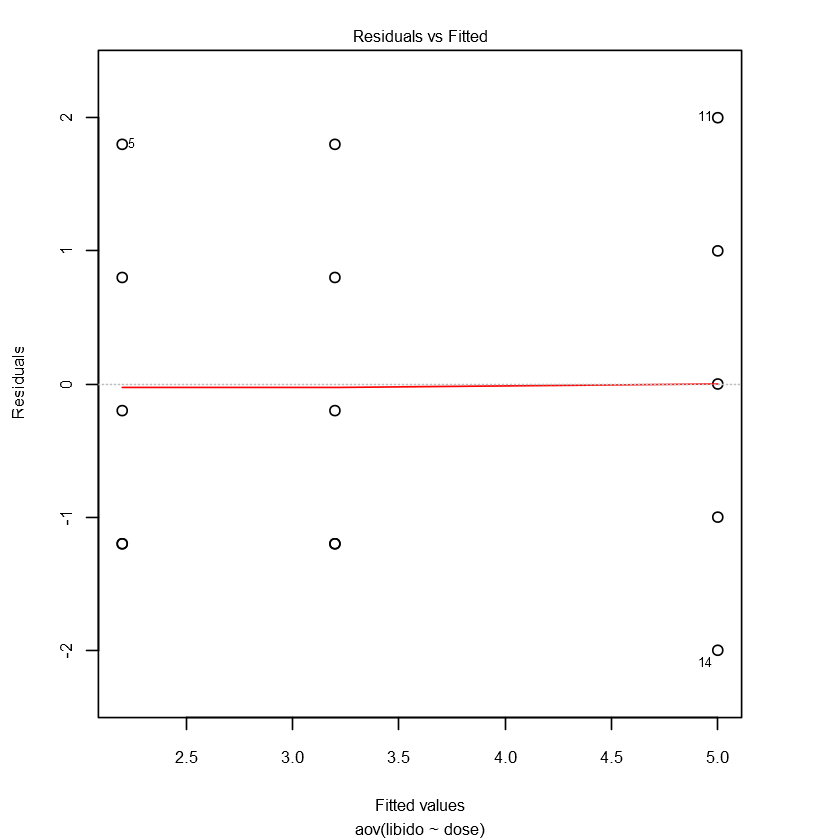

ERROR: Error in title(...): metric information not available for this device


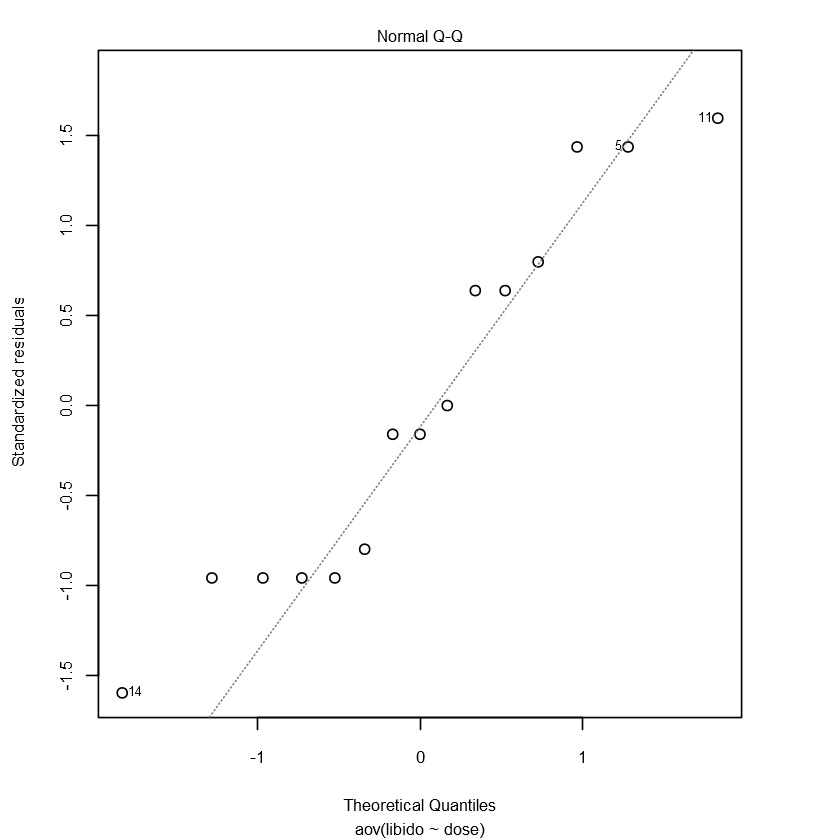

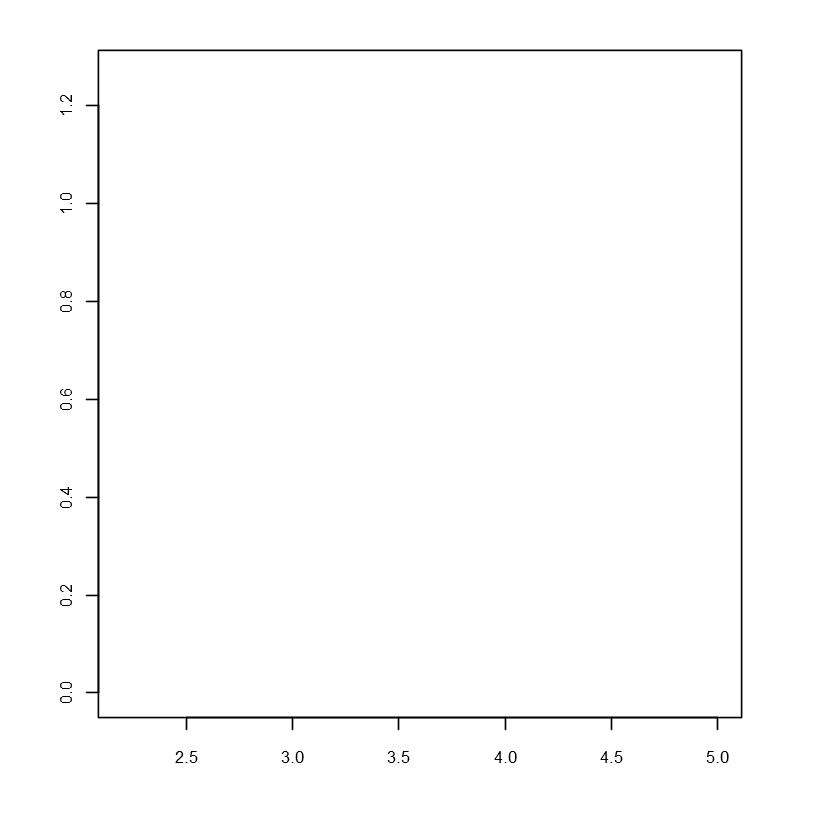

In [16]:
plot(viagraModel) 

* The first graph (on the left of the figure) can be used for testing homogeneity of variance. The plot we have shows points that are equally spread for the
three groups, which implies that variances are similar across groups (which was also the
conclusion reached by Levene’s test)

* The second graph can be sued for testing normality


	One-way analysis of means (not assuming equal variances)

data:  libido and dose
F = 4.3205, num df = 2.0000, denom df = 7.9434, p-value = 0.05374


,Size,Contrast Coef,Wt'd Mean,Mean,Trim'd Mean,Var.,St. Dev.
Placebo,5.00,-1.27,2.20,2.20,2.00,1.70,1.30
Low.Dose,5.00,-0.27,3.20,3.20,3.00,1.70,1.30
High.Dose,5.00,1.53,5.00,5.00,5.00,2.50,1.58


$TEST
[1] 4.320451

$nu1
[1] 2

$nu2
[1] 7.943375

$n
$n[[1]]
[1] 5

$n[[2]]
[1] 5

$n[[3]]
[1] 5


$p.value
[1] 0.05373847

ERROR: Error in is.data.frame(x): object 'v.mat' not found


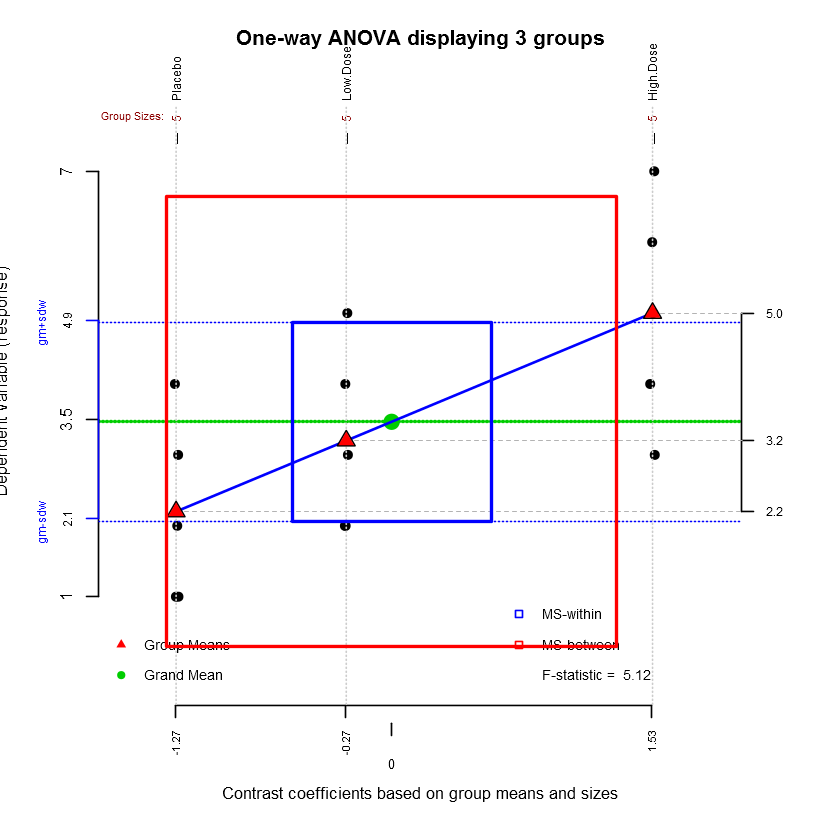

In [27]:
# Welch Test
oneway.test(libido~dose, data = viagraData)


#--------Robust methods--------
# source("http://www-rcf.usc.edu/~rwilcox/Rallfun-v13")

viagraWide<-unstack(viagraData, libido~dose)
granova.1w(viagraWide)

#Trimmed mean:
t1way(viagraWide, tr = .1)
t1way(v.mat, MAT=TRUE, var.col = 2, lev.col = 1, tr = .1)

#compare medians:
med1way(viagraWide)

#bootstrap:
t1waybt(viagraWide, tr = .2, nboot = 599)

#M estimator bootstrap:
b1way(viagraWide, nboot = 599)


### Post hoc Test

* After an ANOVA you need a further analysis to find out which groups differ.
* When you have no specific hypotheses before the experiment, use post hoc tests.
* When you have equal sample sizes and group variances are similar, use Tukey.
* If you want guaranteed control over the Type I error rate, then use Bonferroni.
* If there is any doubt that group variances are equal, then use a robust method (e.g., bootstrap or trimmed means).

In [28]:
#--------Post Hoc Tests----------
pairwise.t.test(viagraData$libido, viagraData$dose, p.adjust.method = "bonferroni")
pairwise.t.test(viagraData$libido, viagraData$dose, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  viagraData$libido and viagraData$dose 

          Placebo Low Dose
Low Dose  0.845   -       
High Dose 0.025   0.196   

P value adjustment method: bonferroni 


	Pairwise comparisons using t tests with pooled SD 

data:  viagraData$libido and viagraData$dose 

          Placebo Low Dose
Low Dose  0.282   -       
High Dose 0.025   0.098   

P value adjustment method: BH 

In [29]:
postHocs<-glht(viagraModel, linfct = mcp(dose = "Tukey"))
summary(postHocs)
confint(postHocs)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = libido ~ dose, data = viagraData)

Linear Hypotheses:
                          Estimate Std. Error t value Pr(>|t|)  
Low Dose - Placebo == 0     1.0000     0.8869   1.127   0.5163  
High Dose - Placebo == 0    2.8000     0.8869   3.157   0.0213 *
High Dose - Low Dose == 0   1.8000     0.8869   2.029   0.1477  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = libido ~ dose, data = viagraData)

Quantile = 2.6676
95% family-wise confidence level
 

Linear Hypotheses:
                          Estimate lwr     upr    
Low Dose - Placebo == 0    1.0000  -1.3660  3.3660
High Dose - Placebo == 0   2.8000   0.4340  5.1660
High Dose - Low Dose == 0  1.8000  -0.5660  4.1660


In [30]:
postHocs<-glht(viagraModel, linfct = mcp(dose = "Dunnett"), base = 1)
summary(postHocs)
confint(postHocs)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = libido ~ dose, data = viagraData)

Linear Hypotheses:
                         Estimate Std. Error t value Pr(>|t|)  
Low Dose - Placebo == 0    1.0000     0.8869   1.127   0.4459  
High Dose - Placebo == 0   2.8000     0.8869   3.157   0.0152 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Dunnett Contrasts


Fit: aov(formula = libido ~ dose, data = viagraData)

Quantile = 2.5026
95% family-wise confidence level
 

Linear Hypotheses:
                         Estimate lwr     upr    
Low Dose - Placebo == 0   1.0000  -1.2196  3.2196
High Dose - Placebo == 0  2.8000   0.5804  5.0196


In [31]:
lincon(viagraWide, tr = .1)
mcppb20(viagraWide, tr = .2, nboot = 2000)

[1] "Note: confidence intervals are adjusted to control FWE"
[1] "But p-values are not adjusted to control FWE"


Group,Group,test,crit,se,df
1.0000000,2.0000000,1.2126781,2.9600000,0.8246211,8.0000000
1.0000000,3.0000000,3.0550505,2.9853968,0.9165151,7.7199125
2.0000000,3.0000000,1.9639610,2.9853968,0.9165151,7.7199125
Group,Group,psihat,ci.lower,ci.upper,p.value
1.000000,2.000000,-1.000000,-3.440879,1.440879,0.259845
1.00000000,3.00000000,-2.80000000,-5.53616139,-0.06383861,0.01638290
2.00000000,3.00000000,-1.80000000,-4.53616139,0.93616139,0.08644456


[1] "Taking bootstrap samples. Please wait."


$psihat
     con.num psihat       se  ci.lower   ci.upper p-value
[1,]       1     -1 1.154701 -3.333333  1.3333333  0.3250
[2,]       2     -3 1.154701 -5.333333 -0.3333333  0.0055
[3,]       3     -2 1.154701 -4.333333  0.6666667  0.0840

$crit.p.value
[1] 0.017

$con
     [,1] [,2] [,3]
[1,]    1    1    0
[2,]   -1    0    1
[3,]    0   -1   -1

In [32]:
lincon(viagraWide)
mcppb20(viagraWide)

[1] "Note: confidence intervals are adjusted to control FWE"
[1] "But p-values are not adjusted to control FWE"


Group,Group,test,crit,se,df
1.0000000,2.0000000,0.8660254,3.7400000,1.1547005,4.0000000
1.000000,3.000000,2.598076,3.740000,1.154701,4.000000
2.000000,3.000000,1.732051,3.740000,1.154701,4.000000
Group,Group,psihat,ci.lower,ci.upper,p.value
1.0000000,2.0000000,-1.0000000,-5.3185800,3.3185800,0.4353309
1.00000000,3.00000000,-3.00000000,-7.31858001,1.31858001,0.06016985
2.0000000,3.0000000,-2.0000000,-6.3185800,2.3185800,0.1583024


[1] "Taking bootstrap samples. Please wait."


$psihat
     con.num psihat       se  ci.lower   ci.upper p-value
[1,]       1     -1 1.154701 -3.333333  1.3333333  0.3250
[2,]       2     -3 1.154701 -5.333333 -0.3333333  0.0055
[3,]       3     -2 1.154701 -4.333333  0.6666667  0.0840

$crit.p.value
[1] 0.017

$con
     [,1] [,2] [,3]
[1,]    1    1    0
[2,]   -1    0    1
[3,]    0   -1   -1

In [33]:
#--------Effect Sizes----------

mes(2.2, 3.2, 1.3038405, 1.3038405, 5, 5)
mes(2.2, 5, 1.3038405, 1.5811388, 5, 5)
mes(3.2, 5, 1.3038405, 1.5811388, 5, 5)

Mean Differences ES: 
 
 d [ 95 %CI] = -0.77 [ -2.28 , 0.74 ] 
  var(d) = 0.43 
  p-value(d) = 0.28 
  U3(d) = 22.16 % 
  CLES(d) = 29.38 % 
  Cliff's Delta = -0.41 
 
 g [ 95 %CI] = -0.69 [ -2.06 , 0.67 ] 
  var(g) = 0.35 
  p-value(g) = 0.28 
  U3(g) = 24.42 % 
  CLES(g) = 31.21 % 
 
 Correlation ES: 
 
 r [ 95 %CI] = -0.36 [ -0.85 , 0.46 ] 
  var(r) = 0.07 
  p-value(r) = 0.35 
 
 z [ 95 %CI] = -0.37 [ -1.25 , 0.5 ] 
  var(z) = 0.14 
  p-value(z) = 0.35 
 
 Odds Ratio ES: 
 
 OR [ 95 %CI] = 0.25 [ 0.02 , 3.86 ] 
  p-value(OR) = 0.28 
 
 Log OR [ 95 %CI] = -1.39 [ -4.13 , 1.35 ] 
  var(lOR) = 1.41 
  p-value(Log OR) = 0.28 
 
 Other: 
 
 NNT = -6.84 
 Total N = 10Mean Differences ES: 
 
 d [ 95 %CI] = -1.93 [ -3.7 , -0.17 ] 
  var(d) = 0.59 
  p-value(d) = 0.04 
  U3(d) = 2.67 % 
  CLES(d) = 8.59 % 
  Cliff's Delta = -0.83 
 
 g [ 95 %CI] = -1.75 [ -3.34 , -0.15 ] 
  var(g) = 0.48 
  p-value(g) = 0.04 
  U3(g) = 4.05 % 
  CLES(g) = 10.86 % 
 
 Correlation ES: 
 
 r [ 95 %CI] = -0.69 